In [31]:
from abc import abstractmethod
import math
import numpy as np
import matplotlib.pyplot as plt


class NormalDistribution:
    def __init__(self, data):
        self.data = data
        self.size = len(data)

        self.expectation = np.mean(data)

        self.var_corrected = np.var(data, ddof=1)

    def __str__(self):
        return f"Expectation: {self.expectation}\nVariance: {self.var_corrected}"

    def __repr__(self):
        return self.__str__()


class AbstractDistribution:
    def __init__(self, lam, data):
        self.lam = lam
        self.data = data
        self.size = len(data)
        self.mean = np.mean(data)

    @abstractmethod
    def log_likelihood(self):
        pass

    @abstractmethod
    def lambda_mle(self, n):
        pass

    def plot(self, lams, lam_true):
        self.plot_log_likelihood(lams)
        self.plot_mle(lam_true)

    def plot_log_likelihood(self, lams):
        log_likelihoods = [self.log_likelihood(lam) for lam in lams]

        plt.figure(figsize=(10, 5))
        plt.plot(lams, log_likelihoods, color="r")
        plt.show()

    def plot_mle(self, lam_true):
        mles = [self.lambda_mle(n) for n in range(1, self.size + 1)]

        plt.figure(figsize=(10, 5))
        plt.scatter(range(1, self.size + 1), mles, marker="o", s=2)
        plt.axhline(y=lam_true, color="r", linestyle="--")
        plt.show()

    def lambdas(self, n: list):
        return [self.lambda_mle(i) for i in n]


class PoissonDistribution(AbstractDistribution):
    def __init__(self, lam, size):
        data = np.random.poisson(lam, size)
        super().__init__(lam, data)

    def log_likelihood(self, lam):
        return (
            -self.size
            + lam
            + np.sum(self.data) * np.log(lam)
            - np.sum(np.log(np.vectorize(math.factorial)(self.data)))
        )

    def lambda_mle(self, n):
        return np.sum(self.data[:n]) / n


class ExponentialDistribution(AbstractDistribution):
    def __init__(self, lam, size):
        data = np.random.exponential(1 / lam, size)
        super().__init__(lam, data)

    def log_likelihood(self, lam):
        return self.size * np.log(lam) - lam * np.sum(self.data)

    def lambda_mle(self, n):
        return n / np.sum(self.data[:n])

In [32]:
np.random.seed(0)

data = np.random.normal(10, 9, 2002)

normal = NormalDistribution(data)
normal

Expectation: 9.84317586137662
Variance: 77.65939274558323

In [33]:
lam = 0.6
N = [i* 6 for i in range(10, 60, 10)]
lams = np.linspace(0.01, lam * 2, 1000)

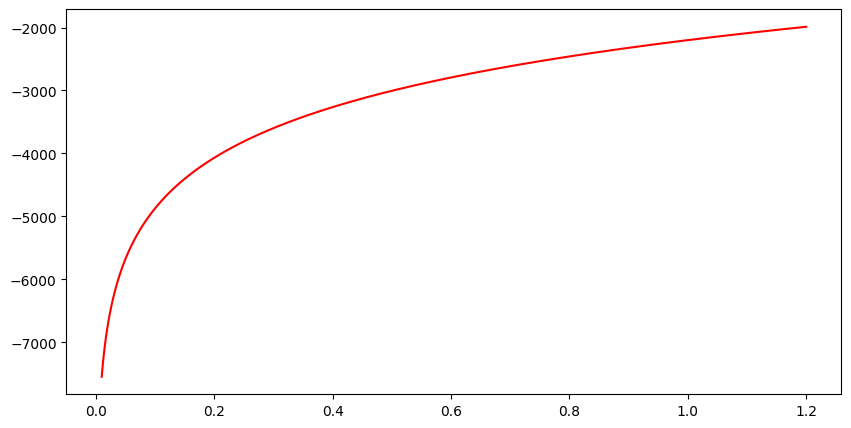

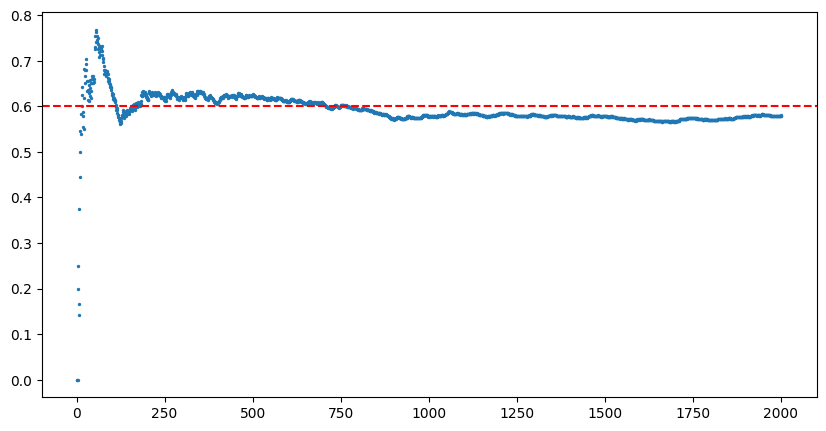

In [34]:
poisson = PoissonDistribution(lam, len(data))
poisson.plot(lams, lam)

In [35]:
lambdas = poisson.lambdas(N)

for i in range(len(N)):
    print(f"λ({N[i]})={lambdas[i]}")

λ(60)=0.75
λ(120)=0.575
λ(180)=0.6
λ(240)=0.6208333333333333
λ(300)=0.62


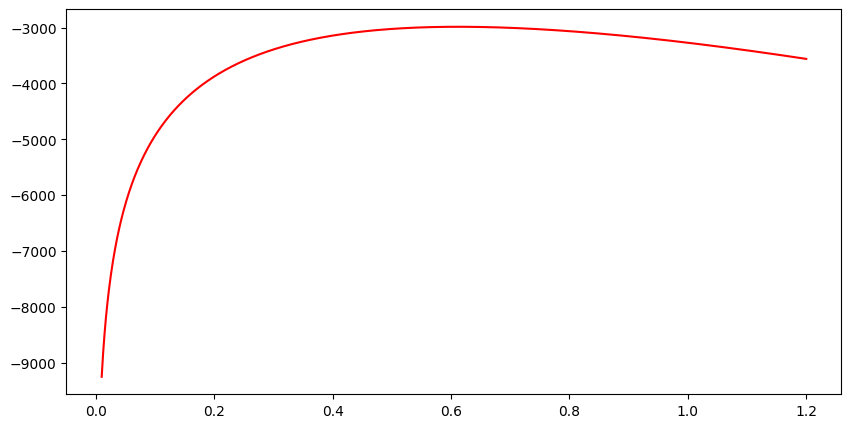

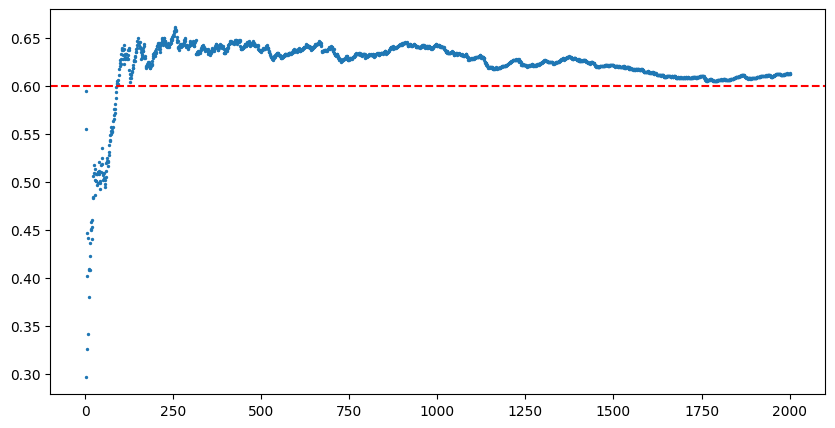

In [36]:
exponential = ExponentialDistribution(lam, len(data))
exponential.plot(lams, lam)

In [37]:
lambdas = exponential.lambdas(N)

for i in range(len(N)):
    print(f"λ({N[i]})={lambdas[i]}")

λ(60)=0.5197324667436855
λ(120)=0.627532925058336
λ(180)=0.6245288025495757
λ(240)=0.6432659979668236
λ(300)=0.6426673296062243
